In [1]:
import os
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import os 
# importing geopy library and Nominatim class
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut 
import geopandas as gpd
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
import time
from shapely.geometry import Point
from shapely.ops import nearest_points

/Users/roosfens/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
#pip install openpyxl

## First steps: 

In [3]:
# Inladen van dataset 
# data bestaat alleen uit Noord-Holland en Flevoland. 
# dataset is opgeschoond door kommas weg te halen bij Katholiek & protestands en bij .nl 
bestandpad = pd.read_csv("duodata01.csv", header=None)
bestandpad.head()

,0
0,PROVINCIE;BEVOEGD GEZAG NUMMER;INSTELLINGSCODE...
1,Flevoland;30357;26RK;26RK00;RK Basisschool De ...
2,Flevoland;30709;23FD;23FD01;Shri Laksmi School...
3,Flevoland;40077;24EJ;24EJ00;Islamitische Basis...
4,Flevoland;40077;28BL;28BL00;Al-Ihsaan;Schor;7;...


In [4]:
# Leesbaar maken van dataset 
file_path = 'duodata01.csv'
data = pd.read_csv(file_path, delimiter=';')
print(data.head())

   PROVINCIE  BEVOEGD GEZAG NUMMER INSTELLINGSCODE VESTIGINGSCODE  \
0  Flevoland                 30357            26RK         26RK00   
1  Flevoland                 30709            23FD         23FD01   
2  Flevoland                 40077            24EJ         24EJ00   
3  Flevoland                 40077            28BL         28BL00   
4  Flevoland                 40114            12PM         12PM00   

                     VESTIGINGSNAAM       STRAATNAAM HUISNUMMER-TOEVOEGING  \
0      RK Basisschool De Toermalijn             Jade                    49   
1                Shri Laksmi School    Regentesseweg                     1   
2  Islamitische Basisschool Al Iman  Harderwijkoever                     3   
3                         Al-Ihsaan            Schor                     7   
4                Basisschool De Ark        Middenhof                   210   

  POSTCODE PLAATSNAAM  GEMEENTENUMMER  ... RPA-GEBIED NAAM WGR-GEBIED CODE  \
0  3893 EB   ZEEWOLDE              50 

In [5]:
# maken van extra kolom "adress" in dataset 
filtered_data = data[data['GEMEENTENAAM'].isin(['ALMERE'])]
filtered_data['ADRESS']= filtered_data['STRAATNAAM'] + ' ' + filtered_data['HUISNUMMER-TOEVOEGING'].astype(str) + ', ' + filtered_data['POSTCODE'] + ' ' + filtered_data['PLAATSNAAM'] 

print(filtered_data)

# data['ADRESS']= data['STRAATNAAM'] + ' ' + data['HUISNUMMER-TOEVOEGING'].astype(str) + ', ' + data['POSTCODE'] + ' ' + data['PLAATSNAAM']
# print(data)


     PROVINCIE  BEVOEGD GEZAG NUMMER INSTELLINGSCODE VESTIGINGSCODE  \
1    Flevoland                 30709            23FD         23FD01   
2    Flevoland                 40077            24EJ         24EJ00   
4    Flevoland                 40114            12PM         12PM00   
5    Flevoland                 40114            12XA         12XA00   
6    Flevoland                 40114            13CW         13CW00   
..         ...                   ...             ...            ...   
114  Flevoland                 41676            31TB         31TB00   
115  Flevoland                 41676            32CJ         32CJ00   
154  Flevoland                 42834            31VV         31VV00   
175  Flevoland                 62584            06RM         06RM00   
176  Flevoland                 62584            32AK         32AK00   

                                 VESTIGINGSNAAM                STRAATNAAM  \
1                            Shri Laksmi School             Regentesse

/var/folders/c4/d1hjy4hs55z494dzspybl0br0000gn/T/ipykernel_7528/2724756041.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['ADRESS']= filtered_data['STRAATNAAM'] + ' ' + filtered_data['HUISNUMMER-TOEVOEGING'].astype(str) + ', ' + filtered_data['POSTCODE'] + ' ' + filtered_data['PLAATSNAAM']


## Latitude and Longitude 

In [6]:
# deze doet het even niet

In [7]:
# #Berekenen van Latitude en Longitude 
# #calling the Nominatim tool and create Nominatim class --> access to OpenStreetMap's Nominatim service.
# loc = Nominatim(user_agent="Geopy Library")

# latitudes = []
# longitudes = []


# for address in filtered_data['ADRESS']:
#     location = loc.geocode(address)
#     if location:
#         latitudes.append(location.latitude)
#         longitudes.append(location.longitude)
#     else:
#         latitudes.append(None)
#         longitudes.append(None)

# filtered_data['latitude'] = latitudes
# filtered_data['longitude'] = longitudes


# # entering the location name
# getLoc = loc.geocode(data['ADRESS'][0])

# # printing address
# print(getLoc.address)

# # printing latitude and longitude
# print("Latitude = ", getLoc.latitude, "\n")
# print("Longitude = ", getLoc.longitude)

In [8]:
# Zorg ervoor dat je 'filtered_data' hebt gedefinieerd als een pandas DataFrame
# Example: filtered_data = pd.DataFrame({'ADRESS': ['Address1', 'Address2']})

# Initialiseer de Nominatim-geocoder
loc = Nominatim(user_agent="Geopy_Library", timeout=10)  # Timeout verhoogd naar 10 seconden

latitudes = []
longitudes = []

def geocode_address(address):
    """Probeer een adres te geocoderen met foutafhandeling en retries."""
    try:
        location = loc.geocode(address)
        return location
    except GeocoderTimedOut:
        print(f"Timeout voor adres: {address}. Opnieuw proberen...")
        return geocode_address(address)  # Probeer opnieuw bij timeout
    except Exception as e:
        print(f"Fout bij geocoderen van {address}: {e}")
        return None

for address in filtered_data['ADRESS']:
    # Voeg een vertraging toe om overbelasting van de server te voorkomen
    time.sleep(1)  # Wacht 1 seconde tussen verzoeken

    # Geocode het adres
    location = geocode_address(address)
    
    # Controleer of er een locatie is gevonden
    if location:
        latitudes.append(location.latitude)
        longitudes.append(location.longitude)
    else:
        latitudes.append(None)
        longitudes.append(None)

# Voeg de resultaten toe aan de DataFrame
filtered_data['latitude'] = latitudes
filtered_data['longitude'] = longitudes

# Debug output: controleer een voorbeeldadres
# Uncomment voor extra debug informatie
# getLoc = geocode_address(filtered_data['ADRESS'][0])
# if getLoc:
#     print("Address:", getLoc.address)
#     print("Latitude:", getLoc.latitude)
#     print("Longitude:", getLoc.longitude)

# Controleer de uiteindelijke DataFrame
filtered_data


/var/folders/c4/d1hjy4hs55z494dzspybl0br0000gn/T/ipykernel_7528/2389180841.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['latitude'] = latitudes
/var/folders/c4/d1hjy4hs55z494dzspybl0br0000gn/T/ipykernel_7528/2389180841.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['longitude'] = longitudes


,PROVINCIE,BEVOEGD GEZAG NUMMER,INSTELLINGSCODE,VESTIGINGSCODE,VESTIGINGSNAAM,STRAATNAAM,HUISNUMMER-TOEVOEGING,POSTCODE,PLAATSNAAM,GEMEENTENUMMER,...,COROPGEBIED CODE,COROPGEBIED NAAM,ONDERWIJSGEBIED CODE,ONDERWIJSGEBIED NAAM,RMC-REGIO CODE,RMC-REGIO NAAM,VAKANTIEREGIO,ADRESS,latitude,longitude
1,Flevoland,30709,23FD,23FD01,Shri Laksmi School,Regentesseweg,1,1312 AA,ALMERE,34,...,40,Flevoland,10,Harderwijk-Amersfoort,18,Flevoland,Noord,"Regentesseweg 1, 1312 AA ALMERE",52.374615,5.211311
2,Flevoland,40077,24EJ,24EJ00,Islamitische Basisschool Al Iman,Harderwijkoever,3,1324 HA,ALMERE,34,...,40,Flevoland,10,Harderwijk-Amersfoort,18,Flevoland,Noord,"Harderwijkoever 3, 1324 HA ALMERE",52.361261,5.209740
4,Flevoland,40114,12PM,12PM00,Basisschool De Ark,Middenhof,210,1354 EV,ALMERE,34,...,40,Flevoland,10,Harderwijk-Amersfoort,18,Flevoland,Noord,"Middenhof 210, 1354 EV ALMERE",52.340464,5.214997
5,Flevoland,40114,12XA,12XA00,Basisschool de Driemaster,Tegelenpad,2,1324 DS,ALMERE,34,...,40,Flevoland,10,Harderwijk-Amersfoort,18,Flevoland,Noord,"Tegelenpad 2, 1324 DS ALMERE",52.360710,5.208042
6,Flevoland,40114,13CW,13CW00,Basisschool de Ichthus,Rijnweg,10,1316 EP,ALMERE,34,...,40,Flevoland,10,Harderwijk-Amersfoort,18,Flevoland,Noord,"Rijnweg 10, 1316 EP ALMERE",52.383498,5.224978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,Flevoland,41676,31TB,31TB00,Montessori Campus 0-18 (primair onderwijs),Rosalind Franklinweg,4,1341 HZ,ALMERE,34,...,40,Flevoland,10,Harderwijk-Amersfoort,18,Flevoland,Noord,"Rosalind Franklinweg 4, 1341 HZ ALMERE",52.366563,5.287467
115,Flevoland,41676,32CJ,32CJ00,De Pauw,Burchard de Volderstraat,19,1349 HJ,ALMERE,34,...,40,Flevoland,10,Harderwijk-Amersfoort,18,Flevoland,Noord,"Burchard de Volderstraat 19, 1349 HJ ALMERE",52.344597,5.313533
154,Flevoland,42834,31VV,31VV00,School van Vrede,Pieter van Damstraat,36,1335 PG,ALMERE,34,...,40,Flevoland,10,Harderwijk-Amersfoort,18,Flevoland,Noord,"Pieter van Damstraat 36, 1335 PG ALMERE",52.404994,5.295516
175,Flevoland,62584,06RM,06RM00,Vrije School Almere,Lierstraat,7,1312 JZ,ALMERE,34,...,40,Flevoland,10,Harderwijk-Amersfoort,18,Flevoland,Noord,"Lierstraat 7, 1312 JZ ALMERE",52.371956,5.193949


## Defining neighborhood boundaries

In [9]:
#andere manier: met het gebruik van shapefile

In [10]:
shp_map = gpd.read_file('/Users/roosfens/Library/CloudStorage/OneDrive-Persoonlijk/documenten/UVA/Jaar 5/Afstudeer Project/Python/cbsgebiedsindelingen2024.gpkg', layer='buurt_gegeneraliseerd')
shp_map.head()

,statcode,jrstatcode,statnaam,gm_code,rubriek,id,geometry
0,BU00340101,2024BU00340101,Centrum Haven Noord,GM0034,buurt,1,"MULTIPOLYGON (((143508.204 483344.282, 143707...."
1,BU00340102,2024BU00340102,Centrum Haven Zuid,GM0034,buurt,2,"MULTIPOLYGON (((143728.650 483029.012, 143730...."
2,BU00340201,2024BU00340201,Rozenwerf en Tuinderswerf,GM0034,buurt,3,"MULTIPOLYGON (((144118.020 483591.859, 144295...."
3,BU00340202,2024BU00340202,Achterwerf,GM0034,buurt,4,"MULTIPOLYGON (((144427.109 483263.953, 144384...."
4,BU00340203,2024BU00340203,Goedewerf en Wittewerf,GM0034,buurt,5,"MULTIPOLYGON (((144267.821 483312.403, 144090...."


In [11]:
#adjust epsg
shp_map = shp_map.to_crs('EPSG:4289')
shp_map.crs

<Geographic 2D CRS: EPSG:4289>
Name: Amersfoort
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Netherlands - onshore, including Waddenzee, Dutch Wadden Islands and 12-mile offshore coastal zone.
- bounds: (3.2, 50.75, 7.22, 53.7)
Datum: Amersfoort
- Ellipsoid: Bessel 1841
- Prime Meridian: Greenwich

In [12]:
#neighborhood shp of almere (alm)
shp_alm = shp_map[shp_map['gm_code'] == 'GM0034'].reset_index(drop=True)
shp_alm.head()

,statcode,jrstatcode,statnaam,gm_code,rubriek,id,geometry
0,BU00340101,2024BU00340101,Centrum Haven Noord,GM0034,buurt,1,"MULTIPOLYGON (((5.21900 52.33891, 5.22193 52.3..."
1,BU00340102,2024BU00340102,Centrum Haven Zuid,GM0034,buurt,2,"MULTIPOLYGON (((5.22224 52.33608, 5.22228 52.3..."
2,BU00340201,2024BU00340201,Rozenwerf en Tuinderswerf,GM0034,buurt,3,"MULTIPOLYGON (((5.22794 52.34115, 5.23055 52.3..."
3,BU00340202,2024BU00340202,Achterwerf,GM0034,buurt,4,"MULTIPOLYGON (((5.23249 52.33821, 5.23187 52.3..."
4,BU00340203,2024BU00340203,Goedewerf en Wittewerf,GM0034,buurt,5,"MULTIPOLYGON (((5.23015 52.33864, 5.22755 52.3..."


In [13]:
# identifiseren buurt
#pois_at_sch['geometry'] = [Point (xy) for xy in zip(pois_at_sch['shape_pt_lon'], shapes_rtm_bus['shape_pt_lat'])]
geometry = shp_alm['geometry']

#gdf_rtm = gdf_rtm.to_crs('EPSG:4289')
#crs = {'init' :'EPSG:4289'} #EPSG for NL (geodetic: 4298; cartesioan: 28992)
#crs = buurt_id.crs
crs = shp_alm.crs
gdf = gpd.GeoDataFrame(filtered_data, crs=crs, geometry=geometry)

#grid_buurt = gpd.sjoin(gdf, shp_ams, op='within')
filtered_data = gpd.sjoin(gdf, shp_alm, how='inner', op='intersects')
filtered_data = pd.DataFrame(filtered_data).reset_index(drop=True)
filtered_data = filtered_data.drop_duplicates(['VESTIGINGSNAAM'], keep='first').reset_index(drop=True)
filtered_data.head()

/Users/roosfens/Library/Python/3.9/lib/python/site-packages/IPython/core/interactiveshell.py:3490: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


,PROVINCIE,BEVOEGD GEZAG NUMMER,INSTELLINGSCODE,VESTIGINGSCODE,VESTIGINGSNAAM,STRAATNAAM,HUISNUMMER-TOEVOEGING,POSTCODE,PLAATSNAAM,GEMEENTENUMMER,...,latitude,longitude,geometry,index_right,statcode,jrstatcode,statnaam,gm_code,rubriek,id
0,Flevoland,30709,23FD,23FD01,Shri Laksmi School,Regentesseweg,1,1312 AA,ALMERE,34,...,52.374615,5.211311,"MULTIPOLYGON (((5.22224 52.33608, 5.22228 52.3...",13,BU00340403,2024BU00340403,Rietmeent en Dijkmeent,GM0034,buurt,14
1,Flevoland,40077,24EJ,24EJ00,Islamitische Basisschool Al Iman,Harderwijkoever,3,1324 HA,ALMERE,34,...,52.361261,5.209740,"MULTIPOLYGON (((5.22794 52.34115, 5.23055 52.3...",3,BU00340202,2024BU00340202,Achterwerf,GM0034,buurt,4
2,Flevoland,40114,12PM,12PM00,Basisschool De Ark,Middenhof,210,1354 EV,ALMERE,34,...,52.340464,5.214997,"MULTIPOLYGON (((5.23015 52.33864, 5.22755 52.3...",3,BU00340202,2024BU00340202,Achterwerf,GM0034,buurt,4
3,Flevoland,40114,12XA,12XA00,Basisschool de Driemaster,Tegelenpad,2,1324 DS,ALMERE,34,...,52.360710,5.208042,"MULTIPOLYGON (((5.22556 52.33917, 5.22228 52.3...",4,BU00340203,2024BU00340203,Goedewerf en Wittewerf,GM0034,buurt,5
4,Flevoland,40114,13CW,13CW00,Basisschool de Ichthus,Rijnweg,10,1316 EP,ALMERE,34,...,52.383498,5.224978,"MULTIPOLYGON (((5.22456 52.33983, 5.22193 52.3...",5,BU00340204,2024BU00340204,Schoolwerf,GM0034,buurt,6


In [14]:
# nieuw dataframe maken met alleen school en buurt 
df = filtered_data[['VESTIGINGSNAAM', 'statnaam', 'statcode', 'VESTIGINGSCODE']].copy()
df.columns = ['school' , 'neighborhood', 'statcode', 'locationcode']
df.head()

,school,neighborhood,statcode,locationcode
0,Shri Laksmi School,Rietmeent en Dijkmeent,BU00340403,23FD01
1,Islamitische Basisschool Al Iman,Achterwerf,BU00340202,24EJ00
2,Basisschool De Ark,Achterwerf,BU00340202,12PM00
3,Basisschool de Driemaster,Goedewerf en Wittewerf,BU00340203,12XA00
4,Basisschool de Ichthus,Schoolwerf,BU00340204,13CW00


## Senario 1 

In [15]:
# inladen dataset van CBS - kerncijfers wijken en buurten 
file_path = 'kwb-2024.xlsx'
data = pd.read_excel(file_path)  # Geen delimiter nodig
data = data[data['recs'] == 'Buurt'].reset_index(drop=True)
data = data[data['gm_naam'] == 'Almere'].reset_index(drop=True)
data.head()

,gwb_code_10,gwb_code_8,regio,gm_naam,recs,gwb_code,ind_wbi,a_inw,a_man,a_vrouw,...,g_afs_kv,g_afs_sc,g_3km_sc,a_opp_ha,a_lan_ha,a_wat_ha,pst_mvp,pst_dekp,ste_mvs,ste_oad
0,BU00340101,00340101,Centrum Haven Noord,Almere,Buurt,BU00340101,1,795,405,390,...,.,.,.,10,9,0,1354,2,2,2050
1,BU00340102,00340102,Centrum Haven Zuid,Almere,Buurt,BU00340102,1,965,450,515,...,.,.,.,41,40,0,1353,5,2,1535
2,BU00340201,00340201,Rozenwerf en Tuinderswerf,Almere,Buurt,BU00340201,1,585,275,310,...,.,.,.,12,12,0,1355,1,2,2063
3,BU00340202,00340202,Achterwerf,Almere,Buurt,BU00340202,1,680,355,330,...,.,.,.,12,11,0,1357,1,2,1781
4,BU00340203,00340203,Goedewerf en Wittewerf,Almere,Buurt,BU00340203,1,560,265,295,...,.,.,.,12,9,2,1357,1,2,1922


In [16]:
# df met alle info Almere 
data[data['gm_naam'].isin(['Almere'])].copy()

,gwb_code_10,gwb_code_8,regio,gm_naam,recs,gwb_code,ind_wbi,a_inw,a_man,a_vrouw,...,g_afs_kv,g_afs_sc,g_3km_sc,a_opp_ha,a_lan_ha,a_wat_ha,pst_mvp,pst_dekp,ste_mvs,ste_oad
0,BU00340101,00340101,Centrum Haven Noord,Almere,Buurt,BU00340101,1,795,405,390,...,.,.,.,10,9,0,1354,2,2,2050
1,BU00340102,00340102,Centrum Haven Zuid,Almere,Buurt,BU00340102,1,965,450,515,...,.,.,.,41,40,0,1353,5,2,1535
2,BU00340201,00340201,Rozenwerf en Tuinderswerf,Almere,Buurt,BU00340201,1,585,275,310,...,.,.,.,12,12,0,1355,1,2,2063
3,BU00340202,00340202,Achterwerf,Almere,Buurt,BU00340202,1,680,355,330,...,.,.,.,12,11,0,1357,1,2,1781
4,BU00340203,00340203,Goedewerf en Wittewerf,Almere,Buurt,BU00340203,1,560,265,295,...,.,.,.,12,9,2,1357,1,2,1922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,BU00347703,00347703,Kathadralenbos,Almere,Buurt,BU00347703,1,0,0,0,...,.,.,.,209,209,0,.,.,.,.
234,BU00347901,00347901,Twentsekant (brt),Almere,Buurt,BU00347901,1,0,0,0,...,.,.,.,92,92,0,1341,1,5,416
235,BU00348501,00348501,Overig Almere Hout Oost,Almere,Buurt,BU00348501,1,20,10,10,...,.,.,.,494,474,20,1349,5,5,13
236,BU00348502,00348502,Overig Almere Hout West,Almere,Buurt,BU00348502,1,60,25,35,...,.,.,.,469,413,56,1358,1,5,105


# ----------------------------------------------------------------------------


## Merge alle kolommen van school, buurt, bevolkingsverdeling

In [17]:
# uit dataframe filtered_data de kolommen vestigingsnaam en buurt halen en kopie in df opslaan
# vervolgens kolomnamen hernoemen naar school en neighborhood 
# nieuwe df2 maken door alleen die rijen van de DataFrame data te selecteren waarin de waarde in de kolom 'gm_naam' gelijk is aan 'Almere'
df = filtered_data[['VESTIGINGSNAAM', 'statnaam', 'statcode', 'VESTIGINGSCODE']].copy()
df.columns = ['school', 'neighborhood', 'statcode', 'locationcode']
df2 = data[data['gm_naam'].isin(['Almere'])].copy()

#nieuwe kolommen aanmaken en som van variabele gebruiken  
df2['n_western'] = df2['a_nl_all'] + df2['a_eur_al']
df2['n_nonwestern'] = df2['a_neu_al']
df2['n_population'] = df2['a_inw'] 
df2['p_western'] = (df2['n_western'] / df2['n_population']) * 100
df2['p_nonwestern'] = (df2['n_nonwestern'] / df2['n_population']) * 100
df2['statcode'] = df2['gwb_code_10']


# merge: 
# kolom neighborhood wordt key (left_on), regio wordt key (right_on), how=left left join wat betekent dat alle rijen uit df behouden blijven 
# na merge wordt regio kolom verwijderd uit df omdat het niet meer nodig is 
#df = df.merge(df2[['regio', 'n_w', 'n_nw', 'n_pop', 'p_w', 'p_nw']], left_on='Neighborhood', right_on='regio', how='left')
df = pd.merge(df, df2[['statcode', 'n_western', 'n_nonwestern', 'n_population', 'p_western', 'p_nonwestern']], on='statcode')
#df = df.drop(columns=['regio'])
df

#print(df.head())


,school,neighborhood,statcode,locationcode,n_western,n_nonwestern,n_population,p_western,p_nonwestern
0,Shri Laksmi School,Rietmeent en Dijkmeent,BU00340403,23FD01,515,180,695,74.100719,25.899281
1,Islamitische Basisschool Al Iman,Achterwerf,BU00340202,24EJ00,535,150,680,78.676471,22.058824
2,Basisschool De Ark,Achterwerf,BU00340202,12PM00,535,150,680,78.676471,22.058824
3,Basisschool de Driemaster,Goedewerf en Wittewerf,BU00340203,12XA00,345,220,560,61.607143,39.285714
4,Basisschool de Ichthus,Schoolwerf,BU00340204,13CW00,305,205,510,59.803922,40.196078
...,...,...,...,...,...,...,...,...,...
66,Montessori Campus 0-18 (primair onderwijs),Muziekwijk Z.-Noord,BU00342901,31TB00,870,930,1805,48.199446,51.523546
67,De Pauw,Muziekwijk Z.-Oost,BU00342902,32CJ00,2050,950,3000,68.333333,31.666667
68,School van Vrede,Seizoenenbuurt West,BU00344303,31VV00,1400,1000,2395,58.455115,41.753653
69,Vrije School Almere,Bloemenbuurt Zuid,BU00344803,06RM00,810,490,1295,62.548263,37.837838


In [18]:
# leerlingen[leerlingen['vestigingscode'].isin(df['vestigingscode'])]

In [19]:
# open nieuwe dataset over leerlingen van scholen en gebruik daarbij alleen Almere
file_path = 'duodata02.csv'
students = pd.read_csv(file_path, delimiter=';', encoding='latin-1')
students = students[students['vestiging_gemeentenaam']== 'ALMERE']
students.head()


,instellingscode,vestigingscode,naam_vestiging,soort_vestiging,denominatie_vestiging,bevoegd_gezag_nummer,vestiging_gemeentecode,vestiging_gemeentenaam,leerlingen.1996,leerlingen.1997,...,leerlingen.2014,leerlingen.2015,leerlingen.2016,leerlingen.2017,leerlingen.2018,leerlingen.2019,leerlingen.2020,leerlingen.2021,leerlingen.2022,leerlingen.2023
2580,06RM,06RM00,Vrije School Almere,BO,Antroposofisch,62584,0034,ALMERE,164,177,...,282,302,338,395,415,446,480,504,505,406
5255,12HU,12HU00,IKC De delta,BO,Rooms-Katholiek,40950,0034,ALMERE,173,152,...,95,107,106,100,99,82,71,70,0,0
5389,12PM,12PM00,Basisschool De Ark,BO,Protestants-Christelijk,40114,0034,ALMERE,180,159,...,207,181,183,168,164,170,175,161,170,164
5408,12QK,12QK00,RK Basissch Panta Rhei,BO,Rooms-Katholiek,40950,0034,ALMERE,435,405,...,249,222,242,239,238,246,245,225,227,226
5529,12XA,12XA00,Basissch de Driemaster,BO,Protestants-Christelijk,40114,0034,ALMERE,210,173,...,96,116,111,116,124,120,143,145,162,163


In [20]:
# Hiermee kan je de kolommen van een dataframe zien 
# leerlingen.columns

In [21]:
# Hiermee kan je de kolommen van een dataframe zien 
#df_schools.columns

In [22]:
# maak nieuw dataframe genaamd leerlingen_df van het dataframe 'leerlingen' en pak daar onderstaande kolommen van en hernoem ze. 
students_df = students[['naam_vestiging' , 'vestigingscode' , 'leerlingen.2023']]
students_df.columns = ['school' , 'locationcode' , 'students']
students_df

,school,locationcode,students
2580,Vrije School Almere,06RM00,406
5255,IKC De delta,12HU00,0
5389,Basisschool De Ark,12PM00,164
5408,RK Basissch Panta Rhei,12QK00,226
5529,Basissch de Driemaster,12XA00,163
...,...,...,...
10053,De Verbeelding,31UY00,99
10066,School van Vrede,31VV00,16
10069,IKC De Woudreus,31VY00,43
10085,Oosterwold,32AK00,107


## Dataframe df_schools: met scholen en leerlingen en verdeling: 

In [23]:
# Berekening:  n_std_western =Total_Students * (p_w / 100)
# Berekening: n_std_nonwestern = Total_studens * (p_nw / 100) 

# Stap 1: Maak een dataset met scholen en hun buurt
students_df = students[['naam_vestiging' , 'vestigingscode' , 'leerlingen.2023']]
students_df.columns = ['school' , 'locationcode' , 'students']
students_df = students_df[students_df['students'] != '<5'].reset_index(drop=True)


# Stap 2: Voeg het percentage westerse bevolking toe aan de dataset
#df_schools = pd.merge(leerlingen_df , df , on='School')
scenario_1 = pd.merge(students_df.drop('school', axis=1) , df , on='locationcode')

scenario_1['students']=scenario_1['students'].astype(float)

# Stap 3: Bereken het aantal westerse studenten
scenario_1['n_std_western'] = scenario_1['students'] * (scenario_1['p_western'] / 100)
scenario_1['n_std_nonwestern'] = scenario_1['students'] * (scenario_1['p_nonwestern'] / 100)

# Resultaat bekijken
#print(df_schools[['school', 'neighborhood', 'leerlingen', 'n_std_western' , 'n_std_nonwestern']].head())
scenario_1


,locationcode,students,school,neighborhood,statcode,n_western,n_nonwestern,n_population,p_western,p_nonwestern,n_std_western,n_std_nonwestern
0,06RM00,406.0,Vrije School Almere,Bloemenbuurt Zuid,BU00344803,810,490,1295,62.548263,37.837838,253.945946,153.621622
1,12PM00,164.0,Basisschool De Ark,Achterwerf,BU00340202,535,150,680,78.676471,22.058824,129.029412,36.176471
2,12QK00,226.0,Rooms Katholieke Basisschool Panta Rhei,Parkwijk Zuidwest,BU00342004,480,110,600,80.000000,18.333333,180.800000,41.433333
3,12XA00,163.0,Basisschool de Driemaster,Goedewerf en Wittewerf,BU00340203,345,220,560,61.607143,39.285714,100.419643,64.035714
4,13CW00,111.0,Basisschool de Ichthus,Schoolwerf,BU00340204,305,205,510,59.803922,40.196078,66.382353,44.617647
...,...,...,...,...,...,...,...,...,...,...,...,...
65,31TB00,115.0,Montessori Campus 0-18 (primair onderwijs),Muziekwijk Z.-Noord,BU00342901,870,930,1805,48.199446,51.523546,55.429363,59.252078
66,31UY00,99.0,De Verbeelding,Rozenwerf en Tuinderswerf,BU00340201,430,160,585,73.504274,27.350427,72.769231,27.076923
67,31VV00,16.0,School van Vrede,Seizoenenbuurt West,BU00344303,1400,1000,2395,58.455115,41.753653,9.352818,6.680585
68,31VY00,43.0,IKC De Woudreus,Waterwijk Zuid,BU00342203,680,310,990,68.686869,31.313131,29.535354,13.464646


In [24]:
# # maak datafile aan van je eigen gevonden gegevens 
# scenario_1.to_csv('scenario_1.csv')


In [25]:
abs((253.945946/scenario_1['n_std_western'].sum() - (153.621622/scenario_1['n_std_nonwestern'].sum())))

0.0016670944539806352

## Dissimilarity Index

In [26]:
# Maak een functie om de Dissimilarity Index per school te berekenen
# row = gegeves v 1 school uit 1 rij van dataset]
# total_western = totaal aantal westerse studenten over alle scholen 
# total_nonwestern = totaal aantal niet westerse studenten over alle scholen 
def compute_di_per_school(row, total_western, total_nonwestern):
    
    # aandeel westerse studenten van deze school ten opzichte van het totaal
    school_western_ratio = row["n_std_western"] / total_western
    # Het aandeel niet-westerse studenten van deze school ten opzichte van het totaal
    school_nonwestern_ratio = row["n_std_nonwestern"] / total_nonwestern
    # formule toepassen 
    return 0.5 * abs(school_western_ratio - school_nonwestern_ratio)

# Totale waarden voor alle scholen (kolom ophalen, aantal westerse studenten per school en dan .sum() voor alle waarde in kolom optellen en samenpakken 
total_western = scenario_1["n_std_western"].sum()
total_nonwestern = scenario_1["n_std_nonwestern"].sum()

# Bereken de DI per school en voeg deze toe als een nieuwe kolom
# Apply functie past compute_di_per_school toe op elke rij van DF , exis=1 zorgt dat het per rij wordt gedaan (school voor school) 
# Args=(total_western, total_nonwestern): extra argumenten doorgeven aan functie. Nodig om verhouding studenten te berekenen 
scenario_1["dissimilarity_index"] = scenario_1.apply(
    compute_di_per_school, axis=1, args=(total_western, total_nonwestern)
)

# Toon de resultaten
print(scenario_1[["school", "dissimilarity_index"]])


                                        school  dissimilarity_index
0                          Vrije School Almere             0.000834
1                           Basisschool De Ark             0.002808
2      Rooms Katholieke Basisschool Panta Rhei             0.004650
3                    Basisschool de Driemaster             0.000583
4                       Basisschool de Ichthus             0.000562
..                                         ...                  ...
65  Montessori Campus 0-18 (primair onderwijs)             0.002167
66                              De Verbeelding             0.001069
67                            School van Vrede             0.000110
68                             IKC De Woudreus             0.000243
69                      Vrijeschool Oosterwold             0.000220

[70 rows x 2 columns]


##  Segregatie level op scholen in Almere, gebaseerd op DI 

In [27]:
print('Segregation level at schools in Almere based on Dissimilarity Index:', scenario_1['dissimilarity_index'].sum())

Segregation level at schools in Almere based on Dissimilarity Index: 0.2894881768077889


In [28]:
# Toon het totale aantal scholen in de DataFrame
print(f"Total number of schools: {len(scenario_1)}")

Total number of schools: 70


In [29]:
merged_new = scenario_1.copy()
merged_new['dissimilarity_index']= merged_new['dissimilarity_index']*100
merged_new

,locationcode,students,school,neighborhood,statcode,n_western,n_nonwestern,n_population,p_western,p_nonwestern,n_std_western,n_std_nonwestern,dissimilarity_index
0,06RM00,406.0,Vrije School Almere,Bloemenbuurt Zuid,BU00344803,810,490,1295,62.548263,37.837838,253.945946,153.621622,0.083355
1,12PM00,164.0,Basisschool De Ark,Achterwerf,BU00340202,535,150,680,78.676471,22.058824,129.029412,36.176471,0.280844
2,12QK00,226.0,Rooms Katholieke Basisschool Panta Rhei,Parkwijk Zuidwest,BU00342004,480,110,600,80.000000,18.333333,180.800000,41.433333,0.464978
3,12XA00,163.0,Basisschool de Driemaster,Goedewerf en Wittewerf,BU00340203,345,220,560,61.607143,39.285714,100.419643,64.035714,0.058337
4,13CW00,111.0,Basisschool de Ichthus,Schoolwerf,BU00340204,305,205,510,59.803922,40.196078,66.382353,44.617647,0.056213
...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,31TB00,115.0,Montessori Campus 0-18 (primair onderwijs),Muziekwijk Z.-Noord,BU00342901,870,930,1805,48.199446,51.523546,55.429363,59.252078,0.216694
66,31UY00,99.0,De Verbeelding,Rozenwerf en Tuinderswerf,BU00340201,430,160,585,73.504274,27.350427,72.769231,27.076923,0.106880
67,31VV00,16.0,School van Vrede,Seizoenenbuurt West,BU00344303,1400,1000,2395,58.455115,41.753653,9.352818,6.680585,0.010963
68,31VY00,43.0,IKC De Woudreus,Waterwijk Zuid,BU00342203,680,310,990,68.686869,31.313131,29.535354,13.464646,0.024281


In [30]:
merged_new_unique = merged_new.drop_duplicates('school')
merged_new_unique

,locationcode,students,school,neighborhood,statcode,n_western,n_nonwestern,n_population,p_western,p_nonwestern,n_std_western,n_std_nonwestern,dissimilarity_index
0,06RM00,406.0,Vrije School Almere,Bloemenbuurt Zuid,BU00344803,810,490,1295,62.548263,37.837838,253.945946,153.621622,0.083355
1,12PM00,164.0,Basisschool De Ark,Achterwerf,BU00340202,535,150,680,78.676471,22.058824,129.029412,36.176471,0.280844
2,12QK00,226.0,Rooms Katholieke Basisschool Panta Rhei,Parkwijk Zuidwest,BU00342004,480,110,600,80.000000,18.333333,180.800000,41.433333,0.464978
3,12XA00,163.0,Basisschool de Driemaster,Goedewerf en Wittewerf,BU00340203,345,220,560,61.607143,39.285714,100.419643,64.035714,0.058337
4,13CW00,111.0,Basisschool de Ichthus,Schoolwerf,BU00340204,305,205,510,59.803922,40.196078,66.382353,44.617647,0.056213
...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,31TB00,115.0,Montessori Campus 0-18 (primair onderwijs),Muziekwijk Z.-Noord,BU00342901,870,930,1805,48.199446,51.523546,55.429363,59.252078,0.216694
66,31UY00,99.0,De Verbeelding,Rozenwerf en Tuinderswerf,BU00340201,430,160,585,73.504274,27.350427,72.769231,27.076923,0.106880
67,31VV00,16.0,School van Vrede,Seizoenenbuurt West,BU00344303,1400,1000,2395,58.455115,41.753653,9.352818,6.680585,0.010963
68,31VY00,43.0,IKC De Woudreus,Waterwijk Zuid,BU00342203,680,310,990,68.686869,31.313131,29.535354,13.464646,0.024281


## Plot dissimilarity index Almere 

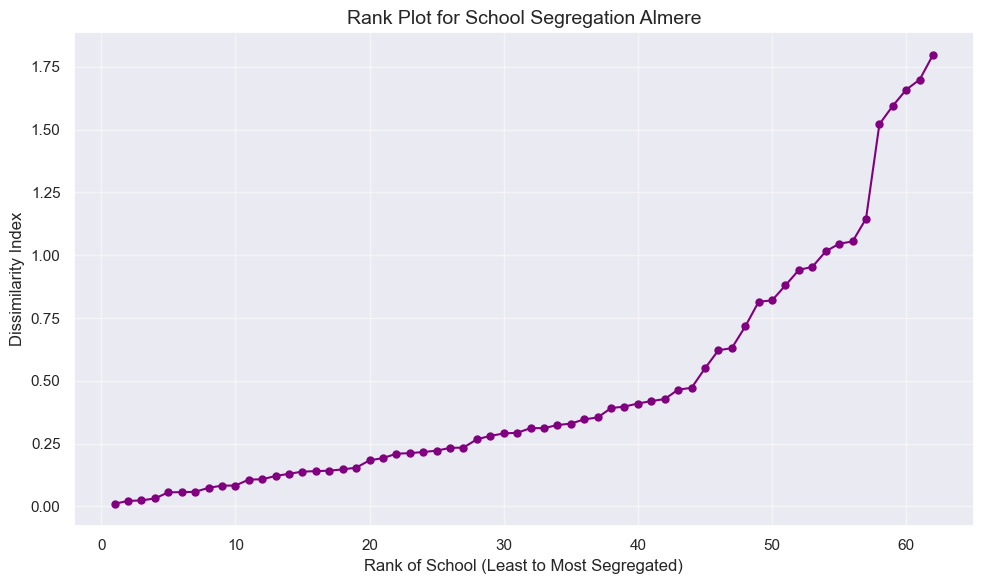

In [31]:
# Sorteren van scholen op basis van de dissimilarity index
scenario_1_dissimilarity = merged_new_unique.sort_values(by='dissimilarity_index', ascending=True)

# Toevoegen van een rank kolom op basis van de gesorteerde waarden
scenario_1_dissimilarity['rank'] = range(1, len(scenario_1_dissimilarity) + 1)

# Plot maken
plt.figure(figsize=(10, 6))
plt.plot(scenario_1_dissimilarity['rank'], scenario_1_dissimilarity['dissimilarity_index'], marker='o', linestyle='-', markersize=5, color = 'purple')

# Assen labels en titel
plt.xlabel('Rank of School (Least to Most Segregated)', fontsize=12)
plt.ylabel('Dissimilarity Index', fontsize=12)
plt.title('Rank Plot for School Segregation Almere', fontsize=14)

# Grid toevoegen voor betere leesbaarheid
plt.grid(alpha=0.5)

# Plot laten zien
plt.tight_layout()
plt.savefig("rank_scenario1_alm.png", dpi=300, bbox_inches='tight')
plt.show()

In [32]:
# maak datafile aan van je eigen gevonden gegevens 
# filtered_data.to_csv('almere.csv')
